**소개 **

관심이 있으십니까?
1. 시청자, 가입자, 비디오 업로드 등이 가장 많은 유튜브 채널은?
2. 비디오 업로드가 많을수록 비디오 보기와 가입자가 많아집니까?
3. 가입자가 많을수록 비디오 시청률이 높아집니까?
4. 채널에 의해 업로드된 비디오의 수와 그에 대한 비디오 뷰 수를 기준으로 가입자의 수를 예측할 수 있는 방법이 있습니까? 

그리고 나서, 저는 몇 가지 시각적 도구와 분석적 도구를 사용하여 이러한 질문에 답하려고 했습니다.

In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("C:/Users/SAMSUNG/Desktop/example"))

['chopstick-effectiveness.csv', 'data.csv', '새 폴더']


## statsmodels에서 제공하는 데이터셋
statsmodels 패키지의 개발 목표 중 하나는 기존에 R을 사용하여 통계 분석 및 시계열 분석을 하던 사용자가 파이썬에서 동일한 분석을 할 수 있도록 하는 것이다. 따라서 R에서 제공하던 명령어 뿐만 아니라 데이터셋도 동일하게 제공하기 위해 Rdatasets 이라는 프로젝트를 통해 R에서 사용하던 1000개 이상의 표준 데이터셋을 사용할 수 있도록 지원한다. 자세한 사항은 다음 프로젝트 홈페이지에서 확인할 수 있다.

https://github.com/vincentarelbundock/Rdatasets

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [4]:
df = pd.read_csv("C:/Users/SAMSUNG/Desktop/example/data.csv")

In [5]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [6]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 136.8+ KB


In [9]:
#df['Subscribers'] = df['Subscribers'].convert_objects(convert_numeric=True)
#df['Video Uploads'] = df['Video Uploads'].convert_objects(convert_numeric=True)

df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
df['Video Uploads'] = pd.to_numeric(df['Video Uploads'], errors='coerce')

**예측자료 분석**

먼저 각 채널 분류에서 상위 20개를 보여주는 막대 그래프를 그려보겠습니다. 3위는 시청자 수, 가입자 수, 비디오 시청률을 나타내는 순위에서 상위 20위다. 두 번째 세 명은 각 그룹별로 상위 20위 안에 든다.

Text(0.5,1,'Number of subscribers of top 20 channels')

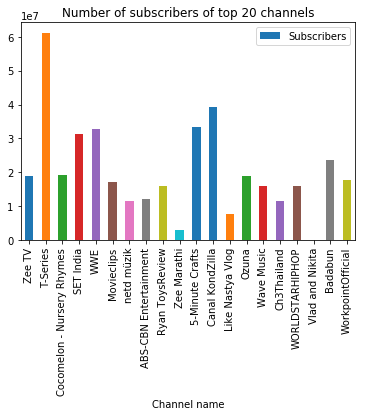

In [12]:
df.head(20).plot.bar(x='Channel name', y='Subscribers')
plt.title('Number of subscribers of top 20 channels')

Text(0.5,1,'Number of video views of top 20 channels')

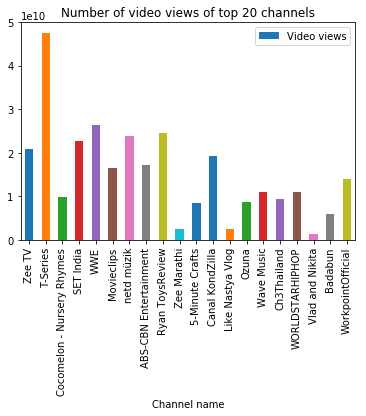

In [13]:
df.head(20).plot.bar(x = 'Channel name', y = 'Video views')
plt.title('Number of video views of top 20 channels')

Text(0.5,1,'Number of video uploads of top 20 channels')

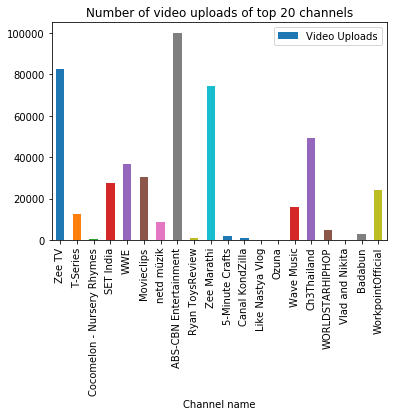

In [14]:
df.head(20).plot.bar(x = 'Channel name', y = 'Video Uploads')
plt.title('Number of video uploads of top 20 channels')

Text(0.5,1,'Top 20 channels with maximum number of subscribers')

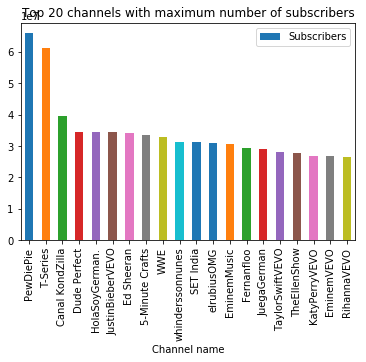

In [15]:
df.sort_values(by = ['Subscribers'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Subscribers')
plt.title('Top 20 channels with maximum number of subscribers')

Text(0.5,1,'Top 20 channels with maximum number of video views')

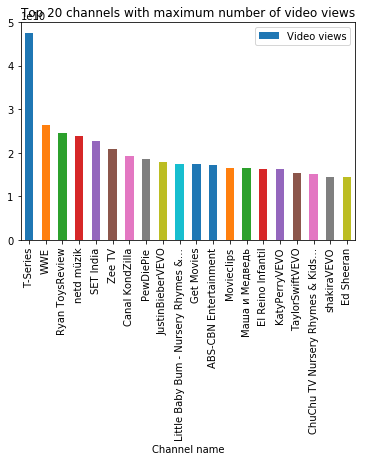

In [16]:
df.sort_values(by = ['Video views'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Video views')
plt.title('Top 20 channels with maximum number of video views')

Text(0.5,1,'Top 20 channels with maximum number of video uploads')

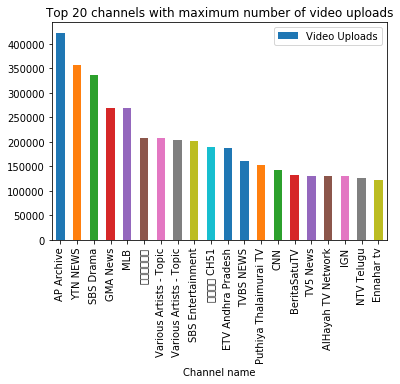

In [17]:
df.sort_values(by = ['Video Uploads'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Video Uploads')
plt.title('Top 20 channels with maximum number of video uploads')

Here I am interested how all the channels in the list distribute in terms of subscribers, video uploads and subscribers going from maximum to minimum in each class. Interestingly there is huge peak at the top list and tend to gain a plateau for the other channels quickly. 

Text(0,0.5,'Number of subscribers')

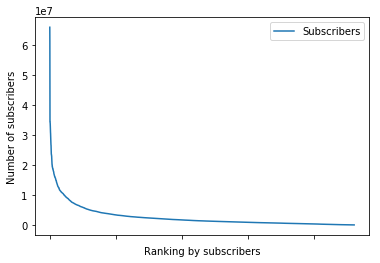

In [18]:
df.sort_values(by = ['Subscribers'], ascending = False).plot(x = 'Channel name', y = 'Subscribers')
plt.xlabel('Ranking by subscribers')
plt.ylabel('Number of subscribers')

Text(0,0.5,'Number of video views')

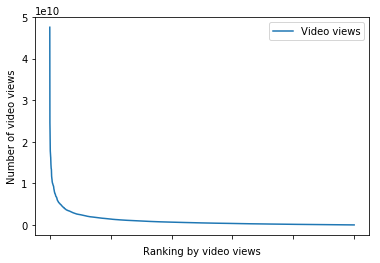

In [19]:
df.sort_values(by = ['Video views'], ascending = False).plot(x = 'Channel name', y = 'Video views')
plt.xlabel('Ranking by video views')
plt.ylabel('Number of video views')

Text(0,0.5,'Number of video uploads')

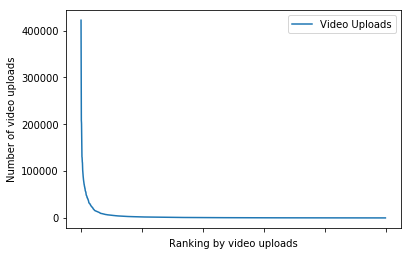

In [20]:
df.sort_values(by = ['Video Uploads'], ascending = False).plot(x = 'Channel name', y = 'Video Uploads')
plt.xlabel('Ranking by video uploads')
plt.ylabel('Number of video uploads')

**Analysing by channel grades**

In [25]:
grade_name = list(set(df['Grade']))
grade_name

['B+ ', '\xa0 ', 'A++ ', 'A ', 'A- ', 'A+ ']

In [26]:
df_by_grade = df.set_index(df['Grade'])

count_grade = list()
for grade in grade_name:
    count_grade.append(len(df_by_grade.loc[[grade]]))

In [28]:
df_by_grade.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
Grade,,,,,,
A++,1st,A++,Zee TV,82757.0,18752951.0,20869786591
A++,2nd,A++,T-Series,12661.0,61196302.0,47548839843
A++,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
A++,4th,A++,SET India,27323.0,31180559.0,22675948293
A++,5th,A++,WWE,36756.0,32852346.0,26273668433
A++,6th,A++,Movieclips,30243.0,17149705.0,16618094724
A++,7th,A++,netd müzik,8500.0,11373567.0,23898730764
A++,8th,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850
A++,9th,A++,Ryan ToysReview,1140.0,16082927.0,24518098041


In [29]:
print(count_grade)
print(grade_name)

[2956, 6, 10, 963, 1024, 41]
['B+ ', '\xa0 ', 'A++ ', 'A ', 'A- ', 'A+ ']


In [30]:
grade_name[2] = 'missing'

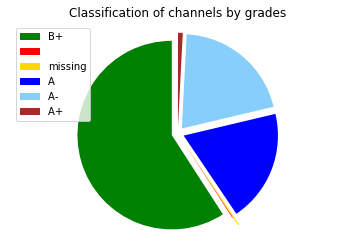

In [32]:
labels = grade_name
sizes = count_grade

explode1 = (0.2, 0.2, 0.5, 0.2, 0.2, 0.2)
color_list = ['green',  'red', 'gold', 'blue', 'lightskyblue', 'brown']

patches, texts = plt.pie(sizes, colors = color_list, explode = explode1, shadow = False, startangle = 90, radius = 3)
plt.legend(patches, labels, loc = "best")
plt.axis('equal')
plt.title('Classification of channels by grades')
plt.show()

In [33]:
df.describe()

,Video Uploads,Subscribers,Video views
count,4994.000000,4.613000e+03,5.000000e+03
mean,3859.463556,2.620004e+06,1.071449e+09
std,17085.866498,3.926447e+06,2.003844e+09
min,1.000000,3.010000e+02,7.500000e+01
25%,141.000000,6.098940e+05,1.862329e+08
50%,443.000000,1.350477e+06,4.820548e+08
75%,1501.750000,2.950056e+06,1.124368e+09
max,422326.000000,6.599531e+07,4.754884e+10


Text(0,0.5,'Log count')

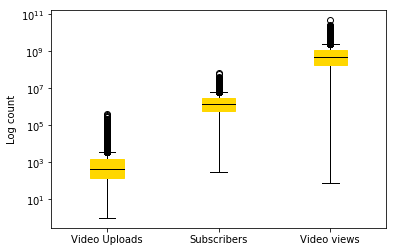

In [34]:
props = dict(boxes="gold", whiskers="Black", medians="Black", caps="Black")
df.plot.box(color=props, patch_artist=True)
plt.yscale('log')
plt.ylabel('Log count')

**변수 간 관계**

아래 그림을 보면, 구독자의 수는 시청자의 수와 긍정적인 상관관계가 있는 것으로 보인다. 그것은 예상된 일이다. 그러나 구독자의 수는 해당 채널에서 업로드한 비디오의 수와 상관 관계가 있습니다. 이것은 놀라운 일일 것이다. 더 많은 수의 시청자들과 구독자들을 끌어들이는 비디오 채널들이 더 적은 수의 비디오를 업로드하고 있다.

Text(0.5,1,'Correlation Matrix Plot')

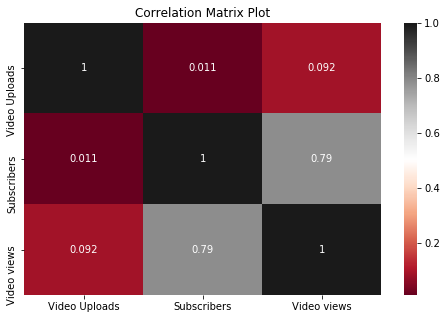

In [40]:
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), cmap = 'RdGy', annot=True)
plt.title('Correlation Matrix Plot')

In [42]:
df_clean = df.dropna()
df_clean.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


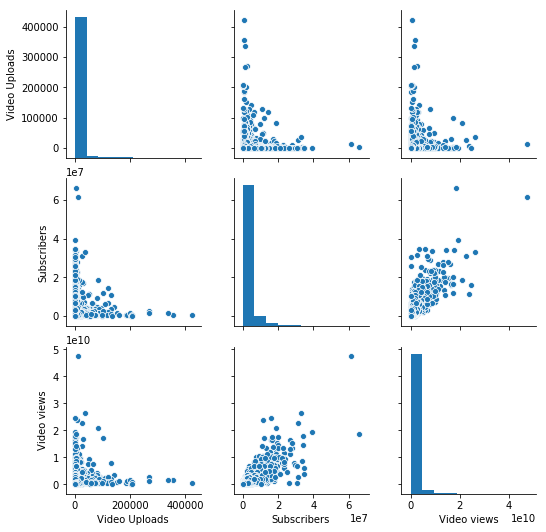

In [43]:
sns.pairplot(df_clean)

**선형 모델**

저는 데이터를 바탕으로 선형 모델을 만들려고 했습니다. 나는 주어진 가입자 수를 예측하기 위해 노력하고 있다. 
업로드한 비디오의 수와 조회된 비디오의 수입니다. 먼저 두 변수 간의 선형 관계에서 시작합니다.

In [44]:
X = df_clean[['Video Uploads', 'Video views']]
Y = df_clean[['Subscribers']]

20% of the data is randomly splitted for the testing purpose. 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [46]:
lm = LinearRegression()
lm.fit(X_train.dropna(),y_train.dropna())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
predictions = lm.predict(X_test)

예상 가입자 수와 시험 집합에서 관측된 가입자 수 사이에는 이미 좋은 상관관계가 있는 것으로 보인다. 그래서 그 모델은 훈련에서 본 적이 없는 데이터에 대해 만족스럽게 일하고 있다.

Text(0,0.5,'Predicted Y')

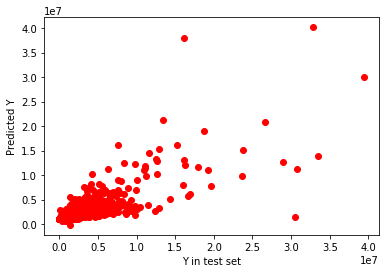

In [48]:
plt.scatter(y_test,predictions, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

Text(0.5,1,'standardized residual plot')

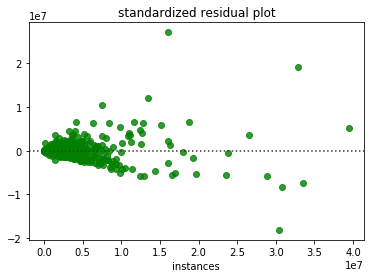

In [50]:
sns.residplot(y_test, predictions,  color="g")
plt.xlabel('instances')
plt.title('standardized residual plot')

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1254173.8159455776
MSE: 6072672895018.983
RMSE: 2464279.3865588745


In [52]:
coefficients = pd.DataFrame(X.columns)
coefficients['coefficients']=lm.coef_[0]
coefficients

,0,coefficients
0,Video Uploads,-11.762355
1,Video views,0.001508


In [53]:
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X_test)

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Subscribers   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     5729.
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:47:15   Log-Likelihood:                -74507.
No. Observations:                4610   AIC:                         1.490e+05
Df Residuals:                    4608   BIC:                         1.490e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Video Uploads    -5.5892      2.083     -2.683      0.007      -9.673      -1.505
Video views       0.0017    1.6e-05    105.687      0.000       0.002       0.002
==============================================================================
Omnibus:                     2968.430   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307668.098
Skew:                           2.201   Prob(JB):                         0.00
Kurtosis:                      42.779   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**데이터의 왜곡에 대한 작업**

다음 세 개의 히스토그램을 형성하면 세 변수가 모두 매우 양의 치우침이 있음을 알 수 있습니다.

Text(0,0.5,'Number of channels')

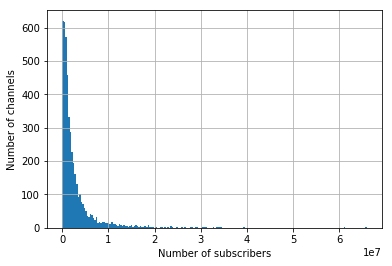

In [55]:
df['Subscribers'].hist(bins = 200)
plt.xlabel('Number of subscribers')
plt.ylabel('Number of channels')

Text(0,0.5,'Number of channels')

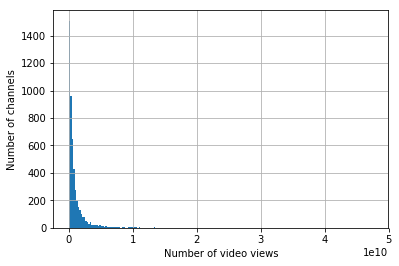

In [56]:
df['Video views'].hist(bins = 200)
plt.xlabel('Number of video views')
plt.ylabel('Number of channels')

Text(0,0.5,'Number of channels')

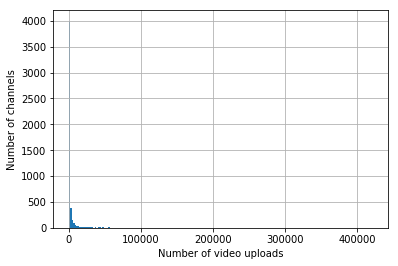

In [57]:
df['Video Uploads'].hist(bins = 200)
plt.xlabel('Number of video uploads')
plt.ylabel('Number of channels')

**로그 변환**

데이터의 긍정적인 편중성을 고려할 때, 간단한 로그 변환은 처리하기에 좋은 선택이 될 수 있습니다.

Text(0,0.5,'Number of channels')

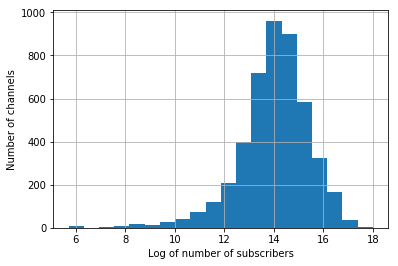

In [58]:
np.log(df['Subscribers']).hist(bins = 20)
plt.xlabel('Log of number of subscribers')
plt.ylabel('Number of channels')

Text(0,0.5,'Number of channels')

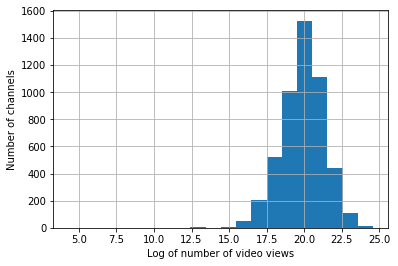

In [59]:
np.log(df['Video views']).hist(bins = 20)
plt.xlabel('Log of number of video views')
plt.ylabel('Number of channels')

Text(0,0.5,'Number of channels')

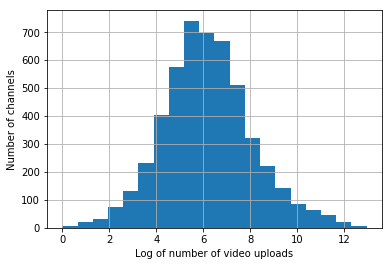

In [60]:
np.log(df['Video Uploads']).hist(bins= 20)
plt.xlabel('Log of number of video uploads')
plt.ylabel('Number of channels')

In [61]:
df_log = pd.DataFrame()
df_log['Video_uploads_log'] = np.log(df_clean['Video Uploads'])
df_log['Video_views_log'] = np.log(df_clean['Video views'])
df_log['Subscribers_log'] = np.log(df_clean['Subscribers'])

In [62]:
df_log.head()

,Video_uploads_log,Video_views_log,Subscribers_log
0,11.323664,23.761568,16.746862
1,9.446282,24.585023,17.929597
2,5.921578,23.004965,16.772411
3,10.215484,23.844571,17.255305
4,10.512057,23.991833,17.307534


In [63]:
df_log.tail()

,Video_uploads_log,Video_views_log,Subscribers_log
4995,6.559615,19.905015,14.544479
4996,6.680855,19.748635,13.869138
4997,4.700480,19.557739,14.998995
4998,8.153350,16.494047,10.403960
4999,5.537334,18.110242,9.960435


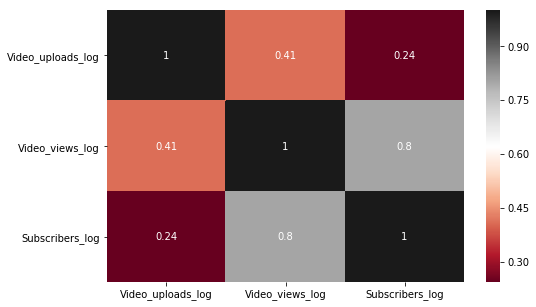

In [65]:
plt.subplots(figsize=(8, 5))
sns.heatmap(df_log.corr(), cmap = 'RdGy',annot=True)

위의 상관 관계 그림에서는 로그 변환 후 변수의 상관 계수가 변경되지 않았습니다. 적어도 양의 상관관계는 양성으로 유지되고 그 반대도 마찬가지이다. 

하지만 아래 산란도를 보면 비디오 업로드와 구독자 사이의 부정적인 상관관계가 사라진 것 같습니다. 이것은 로그 변환의 효과인데, 이것은 그들이 긍정적인 상관관계를 가지고 있다고 생각해서는 안 된다.

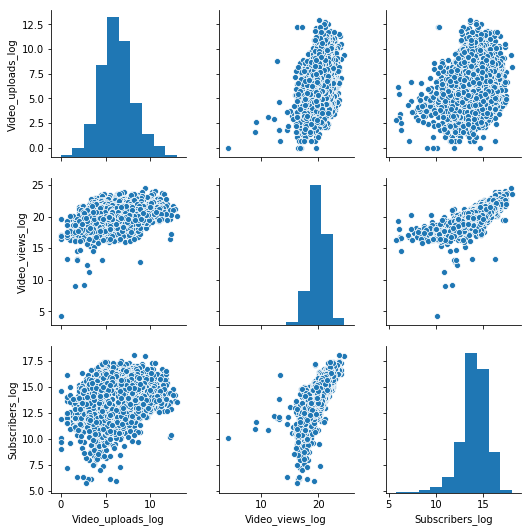

In [66]:
sns.pairplot(df_log)

**Linear model with log transformation**

In [67]:
X2 = df_log[['Video_uploads_log', 'Video_views_log']]
Y2 = df_log[['Subscribers_log']]

In [68]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2)

In [69]:
lm2 = LinearRegression()
lm2.fit(X2_train.dropna(),y2_train.dropna())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
predictions2 = lm2.predict(X2_test)

Text(0,0.5,'Predicted Y')

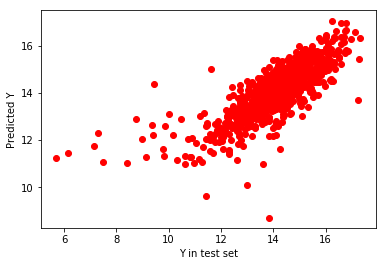

In [71]:
plt.scatter(y2_test,predictions2, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

Text(0.5,1,'standardized residual plot')

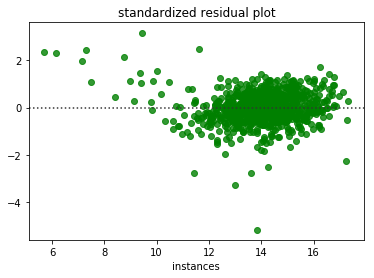

In [73]:
sns.residplot(y2_test, predictions2,  color="g")
plt.xlabel('instances')
plt.title('standardized residual plot')

In [74]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 0.5675809628046227
MSE: 0.7214562076214946
RMSE: 0.8493857825637857


In [75]:
coefficients2 = pd.DataFrame(X2.columns)
coefficients2['coefficients']=lm2.coef_[0]
coefficients2

,0,coefficients
0,Video_uploads_log,-0.080389
1,Video_views_log,0.840114


In [76]:
model2 = sm.OLS(Y2, X2).fit() 
predictions2 = model2.predict(X2_test)

In [77]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Subscribers_log   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.257e+05
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:51:10   Log-Likelihood:                -5807.4
No. Observations:                4610   AIC:                         1.162e+04
Df Residuals:                    4608   BIC:                         1.163e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Video_uploads_log    -0.0598      0.007     -8.455      0.000      -0.074      -0.046
Video_views_log       0.7199      0.002    312.289      0.000       0.715       0.724
==============================================================================
Omnibus:                     1605.423   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23927.454
Skew:                          -1.248   Prob(JB):                         0.00
Kurtosis:                      13.878   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comparing the result with and without log transformation**

Without using log: 

Y = a X_1  + b X_2 + c 

With log 

ln(Y) = p ln(X_1) + q ln(X_2) + r

From the later 

Y = exp( p .... ) = X_1 ^ p + X_2 ^ q + e^r 

다음에서 로그 변환에 의한 예측은 직접 수행된 예측과 비교됩니다. 관계는 위의 셸에서 언급됩니다.

In [78]:
p = coefficients2['coefficients'][0]
q = coefficients2['coefficients'][1]

In [87]:
def pred_from_log(x, y):
    return x ** p + y ** q

In [80]:
X_test.head()

,Video Uploads,Video views
3730,17147.0,549070939
4336,130.0,175906336
1123,96.0,2893179477
876,773.0,885066341
859,4114.0,1382014363


In [81]:
vid_upl_test = np.array(X_test['Video Uploads'])
vid_viw_test = np.array(X_test['Video views'])

In [82]:
prediction_log = pred_from_log(vid_upl_test, vid_viw_test)

Text(0,0.5,'prediction with log transformation')

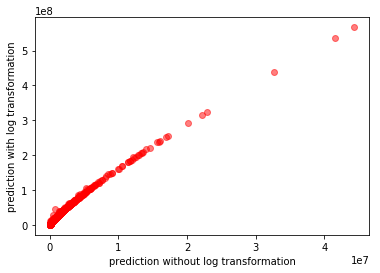

In [88]:
plt.scatter(predictions, prediction_log, color = 'red', alpha = 0.5)
plt.xlabel('prediction without log transformation')
plt.ylabel('prediction with log transformation')

Text(0,0.5,'difference of prediction with and without log')

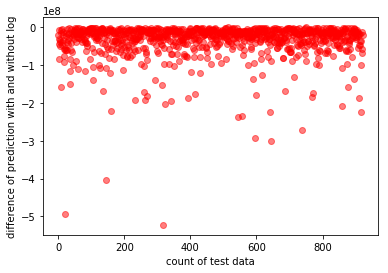

In [85]:
plt.scatter(range(len(X_test)), predictions - prediction_log, color = 'red', alpha = 0.5)
plt.xlabel('count of test data')
plt.ylabel('difference of prediction with and without log')

**결론**

본 연구의 결론은 다음과 같다.
* 가입자는 조회수에 비례합니다. 
* 채널에 의해 업로드되는 비디오의 수와 부정적으로 연관된 가입자의 수입니다. 
* 비디오 업로드 수와 비디오 보기 수의 함수로써 가입자의 수를 예측하는 선형 모델을 테스트하였습니다.
* 선형 모형에 대한 로그 변환은 이러한 변환 없이 선형 모형에 비해 편파적인 예측을 제공합니다.

**Conclusion**

Conclusion of the study is the following:
* The number of subscribers is proportional to the number of views. 
* The number of subscribers in negatively correlated witht the number of video uploads by the channel. 
* Linear model was tested for prediction of number of subscriber as a function of number of video uploads and number of video views.
*  Log transformation on the linear model gives the one sided biased prediction in comparison to the one without such transformation. 
